In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array = 1 797 samples, each consisting of a 8x8 grif of pixels. Let's vizualize the first hundred of them: 


In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots (10, 10, figsize=(8,8),
                           subplot_kw= {'xticks' : [], 'yticks': []},
                           gridspec_kw= dict(hspace =0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap ='binary', interpolation ='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform = ax.transAxes, color = "yellow")

In [3]:
X = digits.data 
X.shape


(1797, 64)

In [4]:
y = digits.target
y.shape

(1797,)

There is 1797 samples and 64 features.

#### Unsupervised learning: Dimensionality reduction

Try to reduce the 64-dimensional parameter space to 2 with manifold learning algorithm

In [5]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape 

(1797, 2)

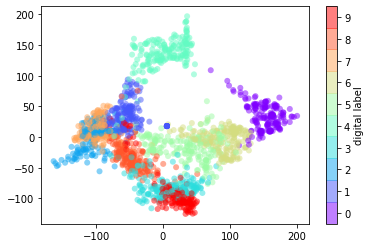

In [10]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c= digits.target, edgecolor = 'none', alpha =0.5, cmap= plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label = 'digital label', ticks = range(10))
plt.clim(-0.5,9.5)

Classification on digits

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With a simple model, we find 80% accuracy for classification of the digits. This number does not tell us where we have wrong that's why we will use the confusion matrix which we can compute with sklearn and vizualize with Seaborn:


Text(91.68, 0.5, 'true value')

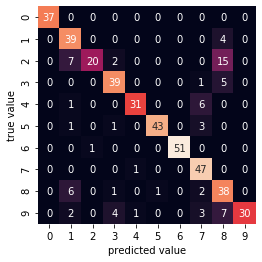

In [22]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

import seaborn as sns

sns.heatmap(mat, square = True, annot = True,  cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

The figure shows us where the mislabeled points tend to be: for instance, a large number of 2 are misclassified as either ones or eights. 

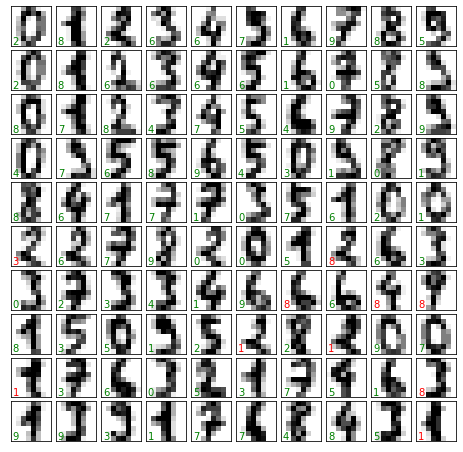

In [30]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                        subplot_kw= {'xticks':[], "yticks":[]},
                         gridspec_kw= dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = "binary", interpolation = "nearest")
    ax.text(0.05, 0.05, str(y_model[i]),
           transform = ax.transAxes,
           color= 'green' if (ytest[i] == y_model[i]) else 'red')
                            

The picture above shows us the data correctly displayed in green and incorrectly in red labels.